In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import (t, norm, ttest_ind)

# ___Descriptive Inference Examples for Single Variables Using Confidence Intervals___
----------------

In [2]:
# !type "..\data\nhanes_2015_2016.csv" -L 5

In [3]:
nhanes = pd.read_csv("../data/nhanes_2015_2016.csv", usecols = ["RIDRETH1", "RIAGENDR", "RIDAGEYR", "BMXBMI", "BPXSY2"]).dropna(axis = 0)

In [4]:
nhanes.columns

Index(['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'BPXSY2', 'BMXBMI'], dtype='object')

#### __RIDRETH1__
-------------

1. Mexican American         
2. Other Hispanic          
3. Non-Hispanic White          
4. Non-Hispanic Black       
5. Other Race - Including Multi-Racial           

In [5]:
nhanes.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,BPXSY2,BMXBMI
0,1,62,3,124.0,27.8
1,1,53,3,140.0,30.8
2,1,78,3,132.0,28.8
3,2,56,3,134.0,42.4
4,2,42,4,114.0,20.3


In [6]:
nhanes.isna().sum(axis = 0)

RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
BPXSY2      0
BMXBMI      0
dtype: int64

In [7]:
nhanes.shape

(5478, 5)

## ___Q: What proportion of Non-Hispanic African Americans age 18+ in the US in 2015 - 2016 had a systolic blood pressure greater than 130 mmHg?___

In [8]:
bpress = nhanes.BPXSY2[(nhanes.RIDAGEYR >= 18) & (nhanes.RIDRETH1 == 4)]

In [9]:
# Sample size

ssize = bpress.size
ssize

1163

In [10]:
# Confidence interval = best estimate +- margin of error

# Best estimate is the proportion of Non-Hispanic Afrcian Americans aged 18+ in 2015 - 2016 in our sample, who has a systolic blood pressure above
# 130 mmHg.

best_est = (bpress > 130).mean()
best_est

0.3757523645743766

In [11]:
# margin of error = multiplier * standard error

# Standard error of the population cannot be computed, so we'll use the sample's standard error.

stderr = np.sqrt(best_est * (1 - best_est) / ssize)
stderr

0.01420167130425752

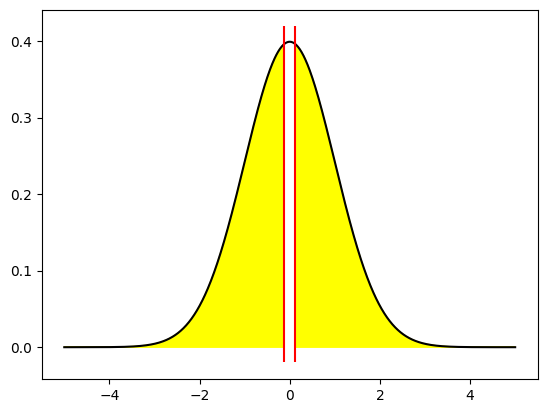

In [12]:
# Since we are dealing with a proportion, our multiplier will be a z score.

# At 95% confidence level,
# We want a z score that will cover 95% of random normal values in a z (standard normal) distribution.
# In other words, a z score that covers 95% of the area of the standard normal curve, cumulatively from both sides of z = 0 line.

z = np.linspace(-5, 5, num = 1000)
zpdfs = norm.pdf(z)

fig, axes = plt.subplots()
axes.plot(z, zpdfs, color = "black")
ymin, ymax = axes.get_ybound()
axes.vlines([-0.125, 0.125], ymin, ymax, color = "red")
axes.fill_between(x = z, y1 = 0, y2 = zpdfs, where = (z <= -0.125) | (z >= 0.125), color = "yellow")
plt.show()

In [13]:
# We need the z score corresponding to the red lines, when the area painted in yellow is 0.95 (95%) of the AUC!.

# What is the fraction of the area, flanked on left by the left red line?
# The curve is symmetric, and the two yellow regions have the same area.

# p = 2 * (1 - cdf(abs(zstat)))
# For Null hypothesis to be ture, p at least needs to be 0.05

# 0.05 = 2 * (1 - cdf(abs(zstat)))

In [14]:
dens = 1 - (0.05 / 2)
dens

0.975

In [15]:
zstat = norm.ppf(dens)
zstat

1.959963984540054

In [16]:
moerr = zstat * stderr
moerr

0.027834764276620714

In [17]:
# 95% confidence interval

lcb, ucb = best_est - moerr, best_est + moerr
lcb, ucb

(0.34791760029775587, 0.40358712885099735)

In [18]:
print(f"We state that the population proportion of non-Hispanic 18+ aged African Americans, living in USA between 2015 - 2016 with a systolic blood \
pressure above 130 mmHg falls between {lcb * 100:.4f} % and {ucb * 100:.4f} % with 95% confidence")

We state that the population proportion of non-Hispanic 18+ aged African Americans, living in USA between 2015 - 2016 with a systolic blood pressure above 130 mmHg falls between 34.7918 % and 40.3587 % with 95% confidence


In [19]:
# What does this 95% con fidence interval mean?

# Out of 100 confidence intervals formulated using 100 different same sized samples as this, 95 of them will cover the true population proportion.

## ___Q. What is the Mean Systolic Blood Pressure for Non-Hispanic African American adults (18+), living in US, between 2015 - 2016?___

In [20]:
# Our best estimate is the sample mean.

best_est = bpress.mean()
best_est

128.1324161650903

In [21]:
# Confidence interval = best estimate +- margin of error
# Margin of error = multiplier * standard error

# Since we are dealing with means, we'll use the t multiplier.
# At 95% confidence level, significance is 0.05 (5%)

# For the Null hypothesis to remain valid, the minimum value p can take is 0.05
# p = 2 * (1 - cdf(abs(tstat)))

tstat = 1 - (0.05 / 2)
tstat

0.975

In [22]:
tscore = t.ppf(tstat, df = ssize - 1)
tscore

1.962007618038093

In [23]:
stderr = bpress.std() / np.sqrt(ssize)
stderr

0.5791999165609172

In [24]:
moerr = tscore * stderr
moerr

1.1363946486595473

In [25]:
# 95% confidence interval,

lcb, ucb = best_est - moerr, best_est + moerr
lcb, ucb

(126.99602151643074, 129.26881081374984)

In [26]:
print(f"We state that the population mean blood pressure of non-Hispanic 18+ aged African Americans, living in USA between 2015 - 2016 \
falls between {lcb:.4f} mmHg and {ucb:.4f} mmHg with 95% confidence.")

We state that the population mean blood pressure of non-Hispanic 18+ aged African Americans, living in USA between 2015 - 2016 falls between 126.9960 mmHg and 129.2688 mmHg with 95% confidence.


## ___Q. Did 33.333% (1/3) of non-Hispanic African Americans aged 18+, living in US in 2015 - 2016 have a systolic blood pressure above 130 mmHg?___

In [27]:
# Hypothesis testing:

# Significance level 5% (alpha = 0.05)

# Null hypothesis: The population proportion of non-hispanic African americans living in the US between 2015 and 2016 with a systolic blood
# pressure above 130 mmHg is 0.33333.

# Alternative hypothesis: The population proportion of non-hispanic African americans living in the US between 2015 and 2016 with a systolic blood
# pressure above 130 mmHg is not 0.33333. (two tailed)

In [30]:
# Our best estimate will be the sample proportion.

best_est = (bpress > 130).mean()
best_est

0.3757523645743766

In [31]:
# test statistic = (best estimate - hypothesized estimate) / standard error
# the standard error of the sample proportion

stderr = np.sqrt(best_est * (1 - best_est) / bpress.size) 
stderr

0.01420167130425752

In [32]:
# test statistic (z score, since this is a proportion)

zstat = (best_est - (1 / 3)) / stderr
zstat

2.9869041700976764

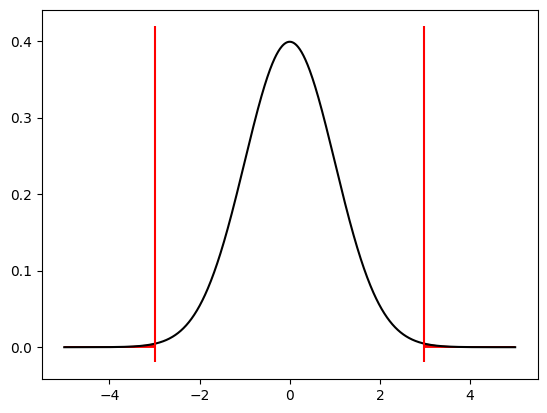

In [35]:
z = np.linspace(-5, 5, num = 1000)
zpdfs = norm.pdf(z)

fig, axes = plt.subplots()
axes.plot(z, zpdfs, color = "black")
ymin, ymax = axes.get_ybound()
axes.vlines([-zstat, zstat], ymin, ymax, color = "red")
axes.fill_between(x = z, y1 = 0, y2 = zpdfs, where = (z <= -zstat) | (z >= zstat), color = "red")
plt.show()

In [37]:
p = 2 * (1 - norm.cdf(zstat))
p

0.0028181804648423903

In [38]:
# Our p value is less than the significance level.
# So we can reject the Null hypothesis.
# There's enough evidence to claim that the population proportion of non-hispanic african americans living in the US between 2015 - 2016
# with a systoloic blood pressure above 130 mmHg was not 0.3333333

## ___Q. Was the mean systolic blood pressure for non-Hispanic African Americans aged 18+, living in US in 2015 - 2016 128 mmHg?___

In [47]:
# Significance level 0.05 (5%)

# Null hypothesis: The mean systolic blood pressure for non-Hispanic African americans aged 18+ living in the US, between 2015 - 2016 is 128 mmHg.

# Alternative hypothesis: The mean systolic blood pressure for non-Hispanic African americans aged 18+ living in the US, between 2015 - 2016 is 
# not 128 mmHg. (two tailed)

# Our best estimate is the sample mean,

best_est = bpress.mean()
best_est

128.1324161650903

In [41]:
# standard error

stderr = bpress.std() / np.sqrt(bpress.size)
stderr

0.5791999165609172

In [42]:
# test statistic

tstat = (best_est - 128) / stderr
tstat

0.228619102496649

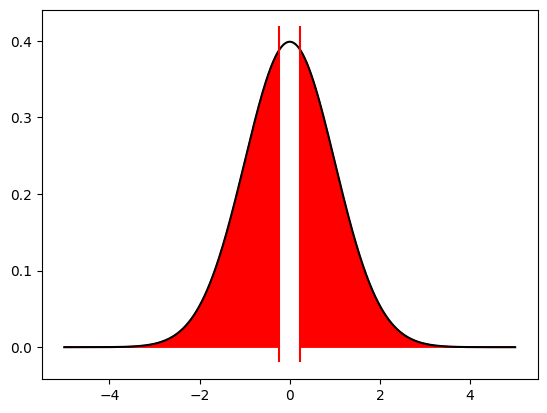

In [44]:
x = np.linspace(-5, 5, num = 1000)
tpdfs = t.pdf(x, df = x.size - 1)

fig, axes = plt.subplots()
axes.plot(x, tpdfs, color = "black")
ymin, ymax = axes.get_ybound()
axes.vlines([-tstat, tstat], ymin, ymax, color = "red")
axes.fill_between(x = z, y1 = 0, y2 = tpdfs, where = (z <= -tstat) | (z >= tstat), color = "red")
plt.show()

In [45]:
p = 2 * (1 - t.cdf(tstat, df = bpress.size - 1))
p

0.8192052027749317

In [46]:
# p value is quite larger than the bsignificance of 0.05
# So, we cannot reject the Null hypothesis.
# There's enough evidence to assert that the mean systolic blood pressure of non-hispanic 18+ african americans living in the US between 2015 - 2016
# is indeed 128 mmHg